<a href="https://colab.research.google.com/github/softwarerbfl/imageProcessing/blob/main/Notebook-Week4/2022_1_ImgProc_HW4_%EB%B0%B0%EA%B7%9C%EB%A6%AC_32202018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영상정보처리 4주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 5점 
- 문제2: 5점

이름: 배규리            
학번: 32202018




In [92]:
from google.colab import drive 
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [93]:
%cd /gdrive/My\ Drive/Colab\ Notebooks/2022_영상정보처리/Notebook-Week\ 4
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm

/gdrive/My Drive/Colab Notebooks/2022_영상정보처리/Notebook-Week 4


Souce image 는 다음의 image_path 를 변경하지 말고 이용할 것. 경로가 다른 경우 감점 -3

In [95]:
image_path = '../Dongkeun-OpenCV-ImgData/logo.png' 

## 문제 1: 부분 이미지를 이용한 이미지 생성

1. 위의 이미지 경로를 이용하여 이미지를 컬러 이미지 org_image 로 읽기
2. 읽은 이미지와 동일 크기의 컬러 이미지를 new_image1 로 만들기 
3. new_image1 를 x 축 방향으로 4등분하고 왼쪽부터 subimage 1, 2, 3, 4 라고 할때 다음과 같이 new_image1을 구성하기 
  - x 축값이 4등분하여 4개의 영역이 동일 크기가 되지 않는 경우, 맨 오른쪽 영역에는 남는 크기 배분
  - subimage 1: 동일 영역에 해당하는 org_image 부분 복사하기 
  - subimage 2: 동일 영역에 해당하는 org_image 부분에서 Red 성분만 복사하고, green/blue 부분은 0으로 하여 subimage 2에 채워 넣을 것
  - subimage 3: 동일 영역에 해당하는 org_image 부분에서 Blue 성분만 복사하고, green/red 부분은 0으로 하여 subimage 3에 채워 넣을 것
  - subimage 4: 동일 영역에 해당하는 org_image 부분에서 Green 성분만 복사하고, blue/red 부분은 0으로 하여 subimage 4에 채워 넣을 것

4. new_image1 을 디스플레이하기 

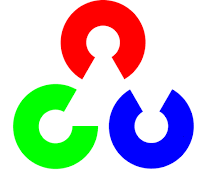

In [96]:
org_image=cv2.imread(image_path)
cv2_imshow(org_image)

In [97]:
print(org_image.shape) #x축을 49,49,49,52로 배분

(172, 199, 3)


In [98]:
new_image1=org_image.copy()
subimage1=new_image1[:,0:49]
subimage2=new_image1[:,49:98]
subimage3=new_image1[:,98:147]
subimage4=new_image1[:,147:199]

In [99]:
#Red성분만 추출
subimage2[:,:,0]=0
subimage2[:,:,1]=0
#Blue성분만 추출
subimage3[:,:,1]=0
subimage3[:,:,2]=0
#Green성분만 추출
subimage4[:,:,0]=0
subimage4[:,:,2]=0

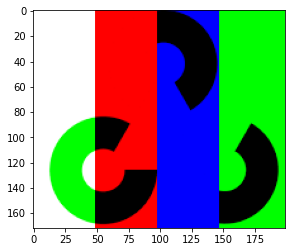

In [100]:
#이미지 연결
new_image=np.concatenate((subimage1,subimage2,subimage3,subimage4),axis=1)
#cv2로 읽었어온 파일이므로 출력시 RGB로 뒤집어주어야 제대로 색 출력
new_image=new_image[:,:,::-1] 

pyplot.imshow(new_image)
pyplot.show()

## 문제 2: 식을 이용한 grayscale 이미지 만들기 

1. org_image와 같은 크기의 공백 grayscale 이미지 new_image2 만들기
2. org_image 의 각 화소를 접근하여 강의에서 설명한 공식을 사용하여 grayscale 값으로 변환하여 새로운 그레이스케일 이미지 new_image2 에 저장하기
2. new_image2 디스플레이하기 

[참조] https://stackoverflow.com/questions/17615963/standard-rgb-to-grayscale-conversion



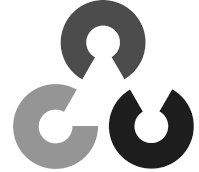

In [101]:
import numpy as np

org_image=cv2.imread(image_path)
b,g,r=cv2.split(org_image)
#공식 적용
new_image2=b*0.114+g*0.587+r*0.299 
cv2_imshow(new_image2.astype(np.uint8))